***
## Quantification<a id='quantification'></a>
***
[Back to Index](#Index)

### Read csv created during analysis and create bar plot

In [3]:
#gene Colors
zfC = {
    'R'  : '#7d7d7d',
    'U' : '#B73AB9',
    'S' : '#4364F6',
    'M' : '#59CB3B',
    'L' : '#CE2A22',
}

zfG = {
    'wt' : '#000000',
    'tbx2a' : '#ab266b',
    'tbx2b' : '#421f8e',
    'foxq2' : '#001dd6',
    'nr2e3' : '#7d7d7d',
}

zfGm = {
    'wt' : 'o',
    'tbx2a' : 'P',
    'tbx2b' : 'X',
    'nr2e3' : '+',
    
}

prLabel = {
    'R'  : 'Rods',
    'U' : 'UV',
    'S' : 'S',
    'M' : 'M',
    'L' : 'L',
}


def formatFigureMain(figH, axH, plotH):
#     font_path = 'C:/Users/pataklk/Documents/Frag_Analysis_Code/Avenir.ttc'
    font_path = '/System/Library/Fonts/Avenir.ttc'
    fontTicks = font_manager.FontProperties(fname=font_path, size=30) # was 18
    fontLabels = font_manager.FontProperties(fname=font_path, size=36) # was 22
    fontTitle = font_manager.FontProperties(fname=font_path, size=30) # was 28 
    axH.set_xscale('linear')
    axH.spines['top'].set_visible(False)
    axH.spines['right'].set_visible(False)
    
    for label in (axH.get_xticklabels() + axH.get_yticklabels()):
        label.set_fontproperties(fontTicks)
    axH.set_xlabel(axH.get_xlabel(), fontproperties = fontTicks)
    axH.set_ylabel(axH.get_ylabel(), fontproperties = fontTicks)
    return fontLabels

def formatFigure(figH, axH, plotH):
    fontLabels = formatFigureMain(figH, axH, plotH)
#     axH.set_xlabel('wt vs. cr', fontproperties=fontLabels)
    axH.set_ylabel('cells per 64 x 64 $\mu$m$^2$', fontproperties=fontLabels)
    axH.xaxis.set_tick_params(rotation=45)

def formatFigureRvU(figH, axH, plotH):
    fontLabels = formatFigureMain(figH, axH, plotH)
    axH.set_xlabel('Rods per 64 x 64 $\mu$m$^2$', fontproperties=fontLabels)
    axH.set_ylabel('UV cones per 64 x 64 $\mu$m$^2$', fontproperties=fontLabels)
    axH.xaxis.set_tick_params(rotation=45)
    
def formatFigureMvS(figH, axH, plotH):
    fontLabels = formatFigureMain(figH, axH, plotH)
    axH.set_xlabel('M cones per 64 x 64 $\mu$m$^2$', fontproperties=fontLabels)
    axH.set_ylabel('S cones per 64 x 64 $\mu$m$^2$', fontproperties=fontLabels)
    axH.xaxis.set_tick_params(rotation=45)

    
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import colorsys
    try:
        c = matplotlib.colors.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*matplotlib.colors.to_rgb(c))
    return matplotlib.colors.rgb2hex(colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2]))

def estimateJitter(dataArray):
    """ creates random jitter scaled by local density of points"""
    from scipy.stats import gaussian_kde
    kde = gaussian_kde(dataArray)
    density = kde(dataArray)
    jitter = np.random.randn(len(dataArray))*density
    return jitter


Dropdown(index=1, layout=Layout(height='40px', width='20%'), options=('Light', 'Dark'), value='Dark')

In [18]:
# Created csv manually during analysis
dPath = "/Users/angueyraaristjm/Documents/eelImaging/tempAnalysis/CRnr2e3F0s/xOGaCT/"
fName = "CRnr2e3F0s_xOGaCT_Counts.csv"

dPath = "/Users/angueyraaristjm/Library/CloudStorage/OneDrive-NationalInstitutesofHealth/zf/Analysis/CRnr2e3F0s/m2Gs2C/"
dPath = "/Users/angueyraaristjm/Documents/eelImaging/tempAnalysis/CRnr2e3F0s/m2Gs2C/"
fName = "CRnr2e3F0s_m2Gs2C_Counts.csv"

df = pd.read_csv(dPath + fName)
df

,filename,R,U,S,M,L,genotype,analysisFlag,genotypingFlag,excludeFlag,notes
0,20220401_5dpf_m2G_s2C_nr2e3F0_L101_002,NaN,NaN,NaN,NaN,NaN,nr2e3,100.0,1,1,wrong line - uv and l cones
1,20220401_5dpf_m2G_s2C_nr2e3F0_L101_004,NaN,NaN,NaN,NaN,NaN,nr2e3,100.0,1,1,wrong line - uv and l cones
2,20220401_5dpf_m2G_s2C_nr2e3F0_L102_002,NaN,NaN,131.0,167.0,NaN,nr2e3,111.0,1,0,002b has dapi in it. slightly rotated-but i do...
3,20220401_5dpf_m2G_s2C_nr2e3F0_L102_004,NaN,NaN,106.0,147.0,NaN,nr2e3,111.0,1,0,NaN
4,20220401_5dpf_m2G_s2C_nr2e3F0_L103_002,NaN,NaN,100.0,122.0,NaN,nr2e3,111.0,1,0,curvy and double+ cells
...,...,...,...,...,...,...,...,...,...,...,...
111,20220401_5dpf_m2G_nr2e3F0_L135_004,NaN,NaN,NaN,NaN,NaN,nr2e3,NaN,1,0,NaN
112,20220401_5dpf_m2G_nr2e3F0_L136_002,NaN,NaN,NaN,NaN,NaN,nr2e3,NaN,1,0,NaN
113,20220401_5dpf_m2G_nr2e3F0_L136_004,NaN,NaN,NaN,NaN,NaN,nr2e3,NaN,1,0,NaN
114,20220401_5dpf_m2G_nr2e3F0_L137_002,NaN,NaN,NaN,NaN,NaN,nr2e3,NaN,1,0,NaN


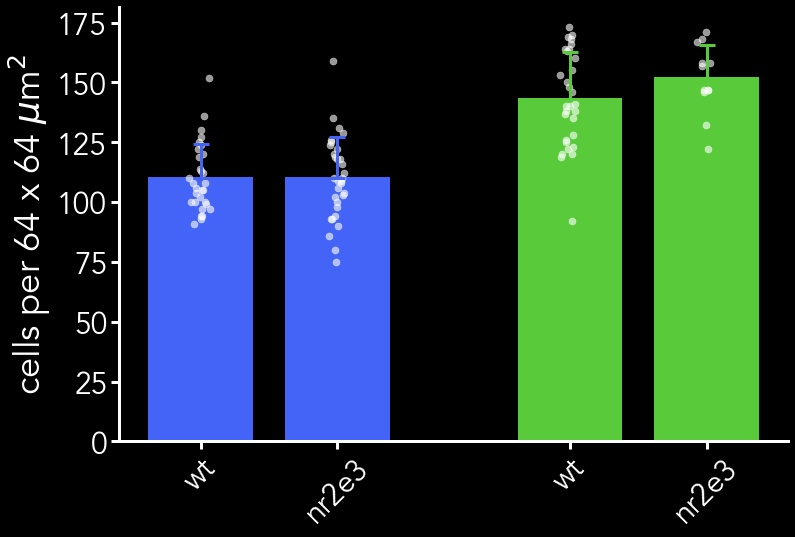

In [20]:
geneList = ['wt','nr2e3']
nGenes = np.size(geneList)
# photoreceptors = ['R','U','S','M','L']
photoreceptors = ['S','M']

plotname = ''
fH, axH = plt.subplots(figsize= [12,8])

barW = nGenes+2; # bar width
barD = nGenes+1; # bar distance whitin 1 photoreceptor subtype
barP = -nGenes+1; # position in x-axis
barStep = 0.9; # distance between photoreceptor groups
barPos = []; #array to save bar positions


j=barP;
for gene in geneList:
    i=0;
    j=j+1;
    for pr in photoreceptors:
        i = i+barStep;
        countData = df[(df['genotype']==gene) & (df['excludeFlag']==False)][pr]
        jitter = np.random.randn(len(countData))*0.01
        textindent = 0.10;
        pH = plt.bar([i+j/barD], np.mean(countData), width=1/barW, color=lighten_color(zfC[pr],1), linewidth = 2, edgecolor = lighten_color(zfC[pr],1)); #color=zfC[pr], 
        pH = plt.errorbar(i+j/barD, np.mean(countData), yerr = [[0],[np.std(countData)]], ecolor=lighten_color(zfC[pr],1), elinewidth=3, capsize=8, capthick=3, zorder=9)
        pH = plt.scatter(np.ones(len(countData))*[i+j/barD]+jitter, countData, color='#ffffff', zorder=8, marker = 'o', s=50, edgecolor='#ffffff', linewidth=0.5, alpha = .6);
        barPos = np.append(barPos,(i+j/barD))

formatFigure(fH, axH, pH)
axH.set_xticks(np.sort(barPos));

axH.set_xticklabels(geneList * len(photoreceptors));
# axH.set_ylim([0,500]); # this was 400

# savePath = 'C:/Users/pataklk/OneDrive - National Institutes of Health/zf/F0_Analysis/CRfoxq2F0/'
# plt.savefig(savePath + "testPlot.svg", transparent=True, format="svg", bbox_inches = "tight")